In [2]:
import  numpy as np
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPool2D,BatchNormalization,Flatten
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# We are classifying 8 classes

In [3]:
train=ImageDataGenerator(rescale=1/255,validation_split=0.15)

In [4]:
train_dataset=train.flow_from_directory('../input/natural-images/natural_images',#use your own directory
                                        target_size=(64,64),
                                        class_mode='sparse',
                                         subset='training',                                 
                                        )
val_dataset=train.flow_from_directory('../input/natural-images/natural_images',#use your own directory
                                        target_size=(64,64),
                                        class_mode='sparse',           
                                        subset='validation',
                                           
                                     )

Found 5867 images belonging to 8 classes.
Found 1032 images belonging to 8 classes.


# All The Classes 

In [5]:
train_dataset.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [272]:
val_dataset.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

# The Model

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.30))
model.add(Flatten())
#model.add(Dense(512,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
#model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
#model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model.add(keras.layers.Dropout(0.50))
model.add(Dense(8,activation='softmax',kernel_initializer='glorot_uniform'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(train_dataset,epochs=1,validation_data=val_dataset)


184/184 [==============================] - 12s 65ms/step - loss: 0.0507 - accuracy: 0.9850 - val_loss: 0.2306 - val_accuracy: 0.9438


# Check For your own Image

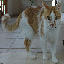

In [87]:
img=image.load_img('../input/natural-images/natural_images/fruit/fruit_0003.jpg',target_size=(64,64))
img

In [88]:
img1=image.img_to_array(img)
img1=img1/255

In [89]:
img1=np.expand_dims(img1,[0])
img1.shape

(1, 64, 64, 3)

In [90]:
k=model.predict(img1)
print(np.argmax(k))

2


In [91]:
train_dataset.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}